# Simple Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset:  lsd.csv

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

TC: Tissue Concentration   1-4
SCORE: Math Score          8-12

In [2]:
# Read the csv file
lsd = pd.read_csv('Resources/lsd.csv')
lsd.head()

,tc,score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [3]:
lsd.tc.values

array([1.17, 2.97, 3.26, 4.69, 5.83, 6.  , 6.41])

In [4]:
# Sklearn requires a 7 X 1 array of values
lsd.tc.values.reshape(-1,1)

array([[1.17],
       [2.97],
       [3.26],
       [4.69],
       [5.83],
       [6.  ],
       [6.41]])

In [12]:
# Assign the data to X and y
X = lsd.tc.values.reshape(-1, 1)
y = lsd.score.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
print("X: ", X)
print("y: ", y)

Shape:  (7, 1) (7, 1)
X:  [[1.17]
 [2.97]
 [3.26]
 [4.69]
 [5.83]
 [6.  ]
 [6.41]]
y:  [[78.93]
 [58.2 ]
 [67.47]
 [37.47]
 [45.65]
 [32.92]
 [29.97]]


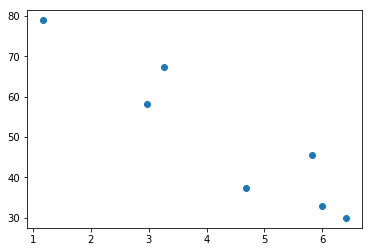

In [13]:
# Visualize the data set
plt.scatter(X, y)

In [15]:
# Call linear function from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
# Fit the model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Print the coefficient and the intercept
print("Weight coefficients: ", model.coef_)
print("y-axis intercept: ", model.intercept_)

Weight coefficients:  [[-9.00946642]]
y-axis intercept:  [89.12387377]


In [19]:
# Transform the min and max values, [[ ]] is required format for model.predict()
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1.17]]
Max X Value: [[6.41]]


In [23]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

print(f"Min y Value: {y_min}")
print(f"Max y Value: {y_max}")

Min y Value: [[78.58279806]]
Max y Value: [[31.37319405]]


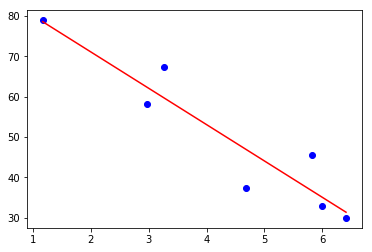

In [22]:
# Generate a linear regression line with x_min, x_max, y_min, y_max
plt.scatter(X, y, c="blue")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c="red")